# Import software libraries and load the dataset

In [21]:
# Import required libraries
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sns                   # Perform data visualization
import matplotlib.pyplot as plt

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

# Read the raw dataset based on data from https://archive.ics.uci.edu/ml/datasets/breast+cancer
print('------------------------------------')
print('Loading the dataset.')

data_raw = pd.read_csv('breast-cancer.csv')
print('Loaded {} records from {}.\n'.format(len(data_raw), 'breast-cancer.csv'))

Libraries used in this project:
- NumPy 1.26.4
- Pandas 2.2.2
- Matplotlib 3.9.2
- SciPy 1.13.1
- Scikit-learn 1.5.1
- Python 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]

------------------------------------
Loading the dataset.
Loaded 286 records from breast-cancer.csv.



# Get acquainted with the data structure and preview the records

In [13]:
# Show the various features and their data types
print(data_raw.dtypes)

# View the first five records
data_raw.head()

recurrence      int64
age_decade      int64
meno_pre        int64
meno_lt_40      int64
meno_ge_40      int64
tumor_size      int64
inv_nodes       int64
node_caps       int64
deg_malig       int64
breast_left     int64
breast_right    int64
irradiat        int64
dtype: object


,recurrence,age_decade,meno_pre,meno_lt_40,meno_ge_40,tumor_size,inv_nodes,node_caps,deg_malig,breast_left,breast_right,irradiat
0,0,30,1,0,0,32,1,0,3,1,0,0
1,0,40,1,0,0,42,1,0,2,0,1,0
2,0,40,1,0,0,42,1,0,2,1,0,0
3,0,60,0,0,1,62,1,0,2,0,1,0
4,0,40,1,0,0,42,1,0,2,0,1,0


# Examine descriptive statistics

In [14]:
# Show descriptive statistics
data_raw.describe()


,recurrence,age_decade,meno_pre,meno_lt_40,meno_ge_40,tumor_size,inv_nodes,node_caps,deg_malig,breast_left,breast_right,irradiat
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.297203,46.643357,0.524476,0.024476,0.451049,48.643357,2.573427,0.223776,2.048951,0.531469,0.468531,0.237762
std,0.457828,10.118183,0.500276,0.154791,0.498470,10.118183,3.451904,0.417504,0.738217,0.499883,0.499883,0.426459
min,0.000000,20.000000,0.000000,0.000000,0.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,0.000000,42.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,1.000000,0.000000,0.000000,52.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
75%,1.000000,50.000000,1.000000,0.000000,1.000000,52.000000,4.000000,0.000000,3.000000,1.000000,1.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,72.000000,25.000000,1.000000,3.000000,1.000000,1.000000,1.000000


# Use histograms to visualize the distribution of various features

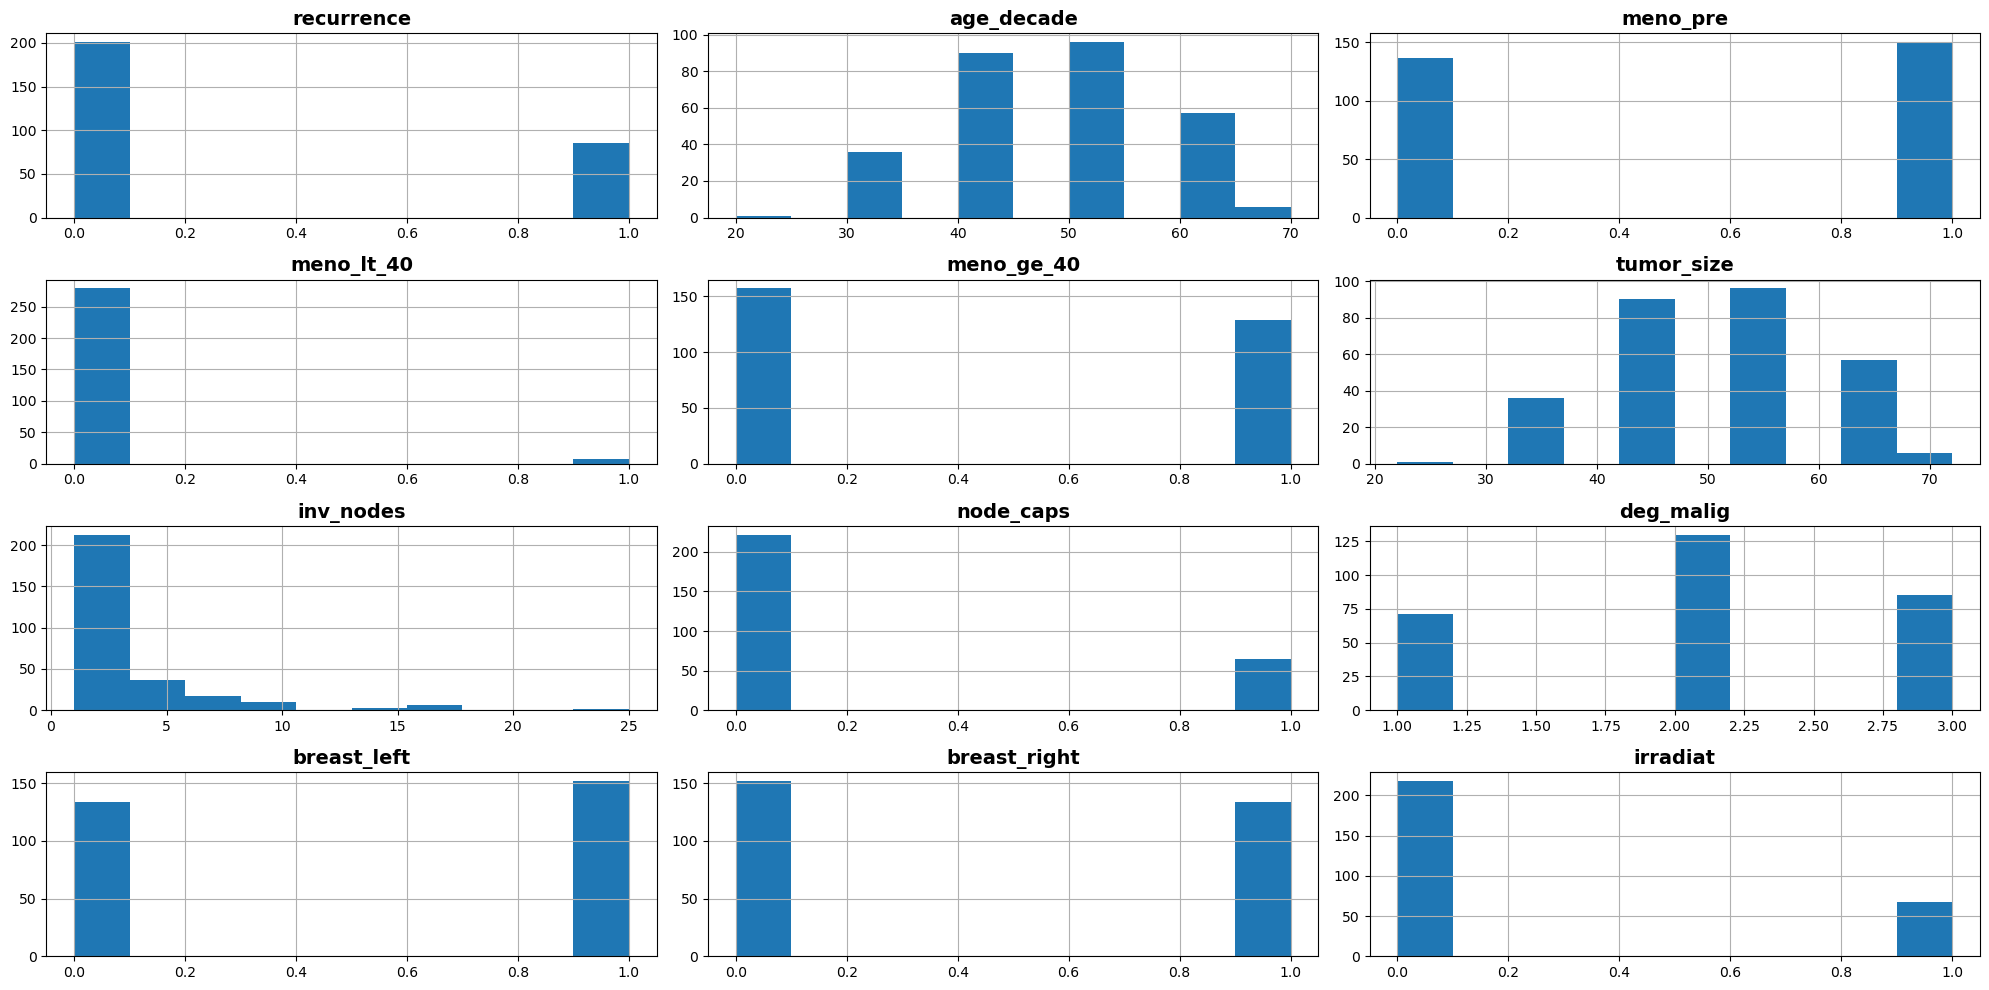

In [22]:
# Show histograms for each attribute in the dataset
axes = data_raw.hist(figsize=(20,10))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=14, fontweight='bold') 
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontstyle='italic')  
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontstyle='italic')  


plt.tight_layout()  
plt.show()

# Split the data into training and validation sets and labels

In [44]:
# Import a function to split the dataset
from sklearn.model_selection import train_test_split

# Specify the column to be included in the label set ('recurrence')
Y = data_raw['recurrence']

# Specify columns to be included in the training and validation sets (all other columns)
X = data_raw.copy().drop(columns=['recurrence'])

# Split the training set, validation set, and labels for both
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

# Compare the number of rows and columns in the original data to the training and validation sets
print(f'Shape of original dataset: {data_raw.shape}')
print('-'* 50)
print(f'The train x sample is {x_train.shape}. The train y sample is {y_train.shape}.')
print(f'The test x sample is {x_test.shape}. The test y sample is {y_test.shape}.')

Shape of original dataset: (286, 12)
--------------------------------------------------
The train x sample is (228, 11). The train y sample is (228,).
The test x sample is (58, 11). The test y sample is (58,).


In [45]:
# Preview the training data
x_train.head()


,age_decade,meno_pre,meno_lt_40,meno_ge_40,tumor_size,inv_nodes,node_caps,deg_malig,breast_left,breast_right,irradiat
147,50,1,0,0,52,4,1,2,1,0,1
228,60,0,0,1,62,4,1,3,0,1,0
154,30,0,1,0,32,1,0,3,0,1,0
134,60,0,0,1,62,1,0,2,1,0,1
219,30,1,0,0,32,1,0,1,0,1,0


In [46]:
# Preview the labels
y_train.head()


147    0
228    1
154    0
134    0
219    1
Name: recurrence, dtype: int64

# Build the model

In [47]:
# Create a logistic regression model, and use the validation data and labels to score it.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train, y_train)

print(log_reg.score(x_test, y_test))

0.7586206896551724


# Test the model

In [59]:
# Add columns to a copy of the test data to compare predictions against actual values.

comparing_data = pd.DataFrame(y_test)
comparing_data['Predicted'] = log_reg.predict(x_test)

# View examples of the predictions compared to actual recurrence.
comparing_data.head()

,recurrence,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
